# Họ và tên: Bùi Quốc Thịnh
# Mã số sinh viên: 20520934

## Load library

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

## Load dataset Salary_Data.csv

In [26]:
dataset = pd.read_csv("./Salary_Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [27]:
y = y.reshape(len(y), 1)

## Split dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [29]:
print('LR init')
lr = LinearRegression()
lr.fit(X_train, y_train)

LR init


LinearRegression()

In [30]:
y_pred = lr.predict(X_test)
print(y_pred)
print(y_test)

[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]]


In [31]:
mse = mean_squared_error(y_test, y_pred)
print('mse:', mse)

mse: 12823412.298126549


### Visualize linear regression

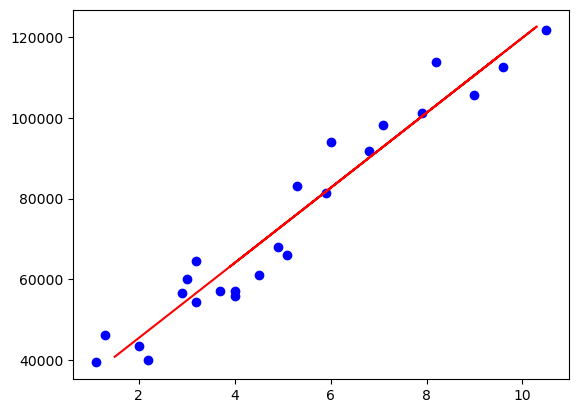

In [32]:
plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_test, y_pred, color= "red")
plt.show()

## Decision Tree

In [33]:
print('DT init')
dt =  DecisionTreeRegressor()
dt.fit(X_train, y_train)

DT init


DecisionTreeRegressor()

In [34]:
y_pred = dt.predict(X_test)
print(y_pred)
print(y_test)

[ 46205.  121872.   56375.5  56375.5 112635.  105582. ]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]]


### Visualize decision tree

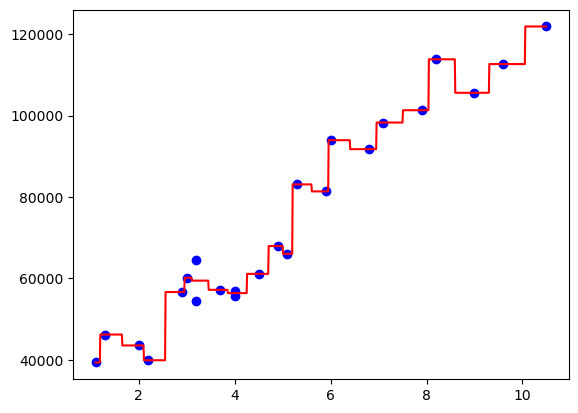

In [35]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_grid, dt.predict(X_grid), color= "red")
plt.show()

## Random Forest

In [36]:
print('RF init')
rf =  RandomForestRegressor()
rf.fit(X_train, y_train)

RF init


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22176\1889392034.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [37]:
y_pred = rf.predict(X_test)
print(y_pred)
print(y_test)

[ 44827.69   118210.      56693.8885  56474.0285 111908.8    107889.9   ]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]]


### Visualize random forest

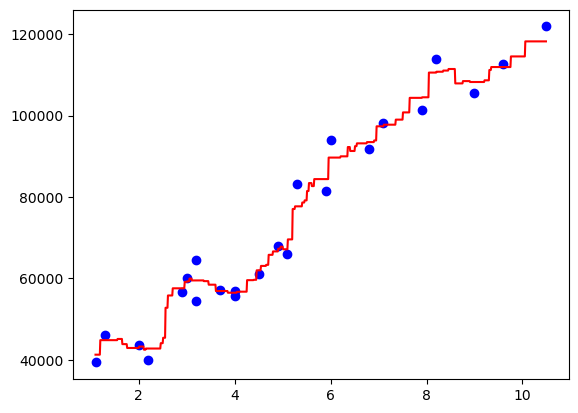

In [38]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_grid, rf.predict(X_grid), color= "red")
plt.show()

## SVR

In [39]:
print('SVR init')
sv =  SVR()
sv.fit(X_train, y_train)

SVR init


C:\Users\ASUS\anaconda3\envs\CS116\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [40]:
y_pred = sv.predict(X_test)
print(y_pred)
print(y_test)

[65232.99939874 65244.74865927 65236.15535271 65235.29365035
 65246.0272739  65247.07520779]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]]


## Visualize SVR

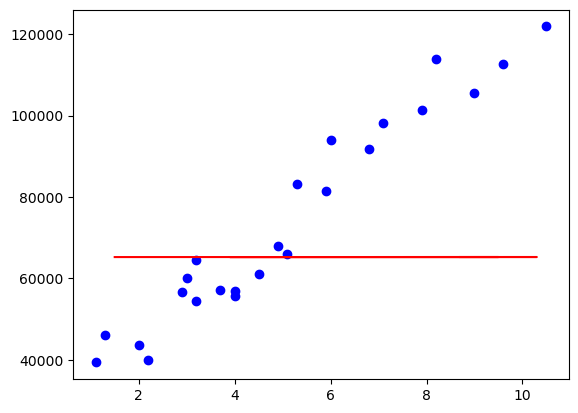

In [41]:
plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_test, y_pred, color= "red")
plt.show()

## SVR with Polynomial kernel

In [42]:
print('SVR init')
sv =  SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
sv.fit(X_train, y_train)

SVR init


C:\Users\ASUS\anaconda3\envs\CS116\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [43]:
y_pred = sv.predict(X_test)
print(y_pred)
print(y_test)

[ 41162.51094001 120963.68357652  61926.9488202   59921.54697967
 116241.30049629 110039.35301191]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]]


### Visualize SVR with Polynomial kernel

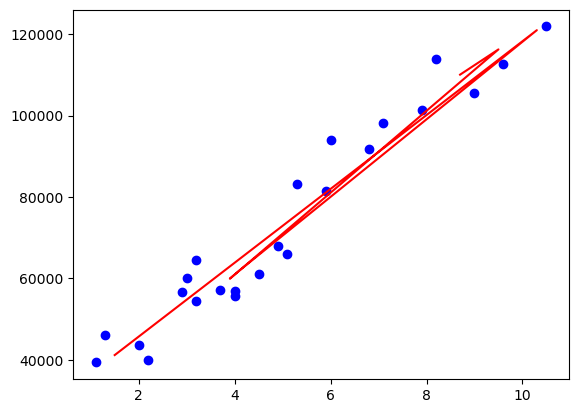

In [44]:
plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_test, y_pred, color= "red")
plt.show()

## Polynomial Regression

In [45]:
print('Polynomial init')
poly = make_pipeline(PolynomialFeatures(6),LinearRegression())
poly.fit(X_train, y_train)

Polynomial init


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [46]:
print(f'score: {poly.score(X_test, y_test)}')

score: 0.9782888949897269


In [47]:
X_seq = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
y_pred = poly.predict(X_seq)
print(y_pred)
print(y_test)

[[ 40816.02570401]
 [ 40957.65668013]
 [ 41107.18926626]
 [ 41264.12456244]
 [ 41427.9824669 ]
 [ 41598.30130834]
 [ 41774.63748128]
 [ 41956.56508435]
 [ 42143.6755616 ]
 [ 42335.57734686]
 [ 42531.89551101]
 [ 42732.27141234]
 [ 42936.36234985]
 [ 43143.8412196 ]
 [ 43354.39617402]
 [ 43567.73028426]
 [ 43783.56120551]
 [ 44001.62084534]
 [ 44221.65503503]
 [ 44443.42320394]
 [ 44666.69805682]
 [ 44891.26525415]
 [ 45116.92309554]
 [ 45343.482206  ]
 [ 45570.76522535]
 [ 45798.60650057]
 [ 46026.85178111]
 [ 46255.35791729]
 [ 46483.99256166]
 [ 46712.63387332]
 [ 46941.17022534]
 [ 47169.49991507]
 [ 47397.53087754]
 [ 47625.18040185]
 [ 47852.37485049]
 [ 48079.04938174]
 [ 48305.14767507]
 [ 48530.62165946]
 [ 48755.43124484]
 [ 48979.54405645]
 [ 49202.93517221]
 [ 49425.58686313]
 [ 49647.48833668]
 [ 49868.63548319]
 [ 50089.03062525]
 [ 50308.68227009]
 [ 50527.60486499]
 [ 50745.81855569]
 [ 50963.34894774]
 [ 51180.22687097]
 [ 51396.48814687]
 [ 51612.17335896]
 [ 51827.327

### Visualize polynomial regression

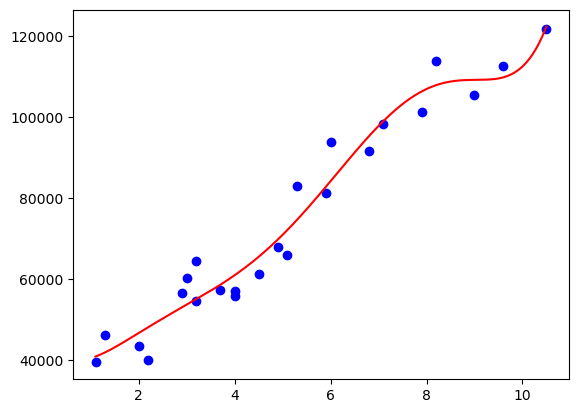

In [48]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_seq, y_pred, color='red')
plt.show()

## Comparision and comment

#### Hầu như tất cả mô hình Linear Regression, Decision Tree Regression, Random Forest Regressor, SVR với Polynomial kernel và Polynomial Regression đều hoạt động khá tốt với tập dataset Salary_Data.csv. Ngoại trừ mô hình SVR thường thì không hoạt động tốt 